In [26]:
!pip install scikit-fuzzy


In [27]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin_min
import skfuzzy as fuzz
from sklearn.manifold import TSNE

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)
data = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])

# Standardize data before clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [28]:
# 2. K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans_labels = kmeans.fit_predict(data_scaled)
data['KMeans Cluster'] = kmeans_labels

# Evaluate KMeans
kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels)
print(f"K-Means: {kmeans_silhouette}")

K-Means: 0.6569234398199433


In [29]:
# 3. DBSCAN Clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)
data['DBSCAN Cluster'] = dbscan_labels

# Evaluate DBSCAN
dbscan_silhouette = silhouette_score(data_scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
print(f"DBSCAN (excluding noise): {dbscan_silhouette}")

DBSCAN (excluding noise): 0.665214856907347


In [30]:
# 4. Fuzzy Clustering (Fuzzy C-Means)
data_transposed = data_scaled.T
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data_transposed, c=4, m=2, error=0.005, maxiter=1000, init=None)

# Get cluster assignments
fuzzy_labels = np.argmax(u, axis=0)
data['Fuzzy Cluster'] = fuzzy_labels

In [31]:
# 5. PCA for Dimensionality Reduction
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data['PCA1'] = data_pca[:, 0]
data['PCA2'] = data_pca[:, 1]

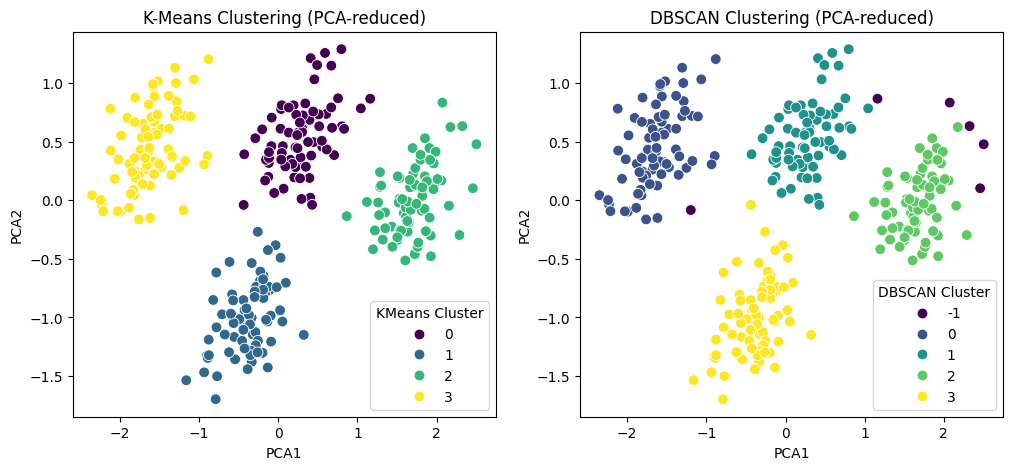

In [32]:
# 6. Visualization with PCA Biplot for KMeans and DBSCAN
plt.figure(figsize=(12, 5))

# KMeans
plt.subplot(1, 2, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans Cluster', data=data, palette='viridis', s=60)
plt.title('K-Means Clustering (PCA-reduced)')

# DBSCAN
plt.subplot(1, 2, 2)
sns.scatterplot(x='PCA1', y='PCA2', hue='DBSCAN Cluster', data=data, palette='viridis', s=60)
plt.title('DBSCAN Clustering (PCA-reduced)')
plt.show()

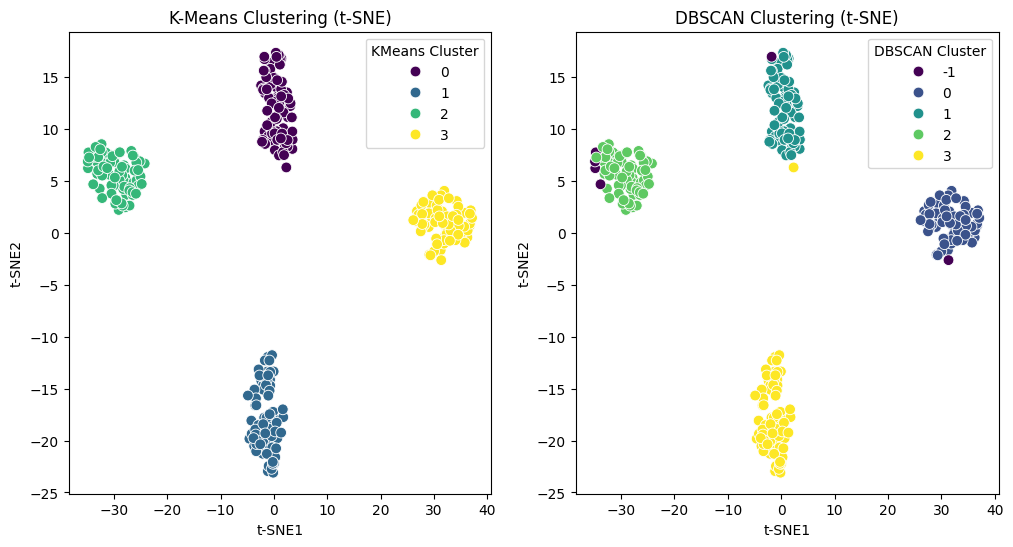

In [33]:
# 7. t-SNE Visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
data_tsne = tsne.fit_transform(data_scaled)
data['t-SNE1'] = data_tsne[:, 0]
data['t-SNE2'] = data_tsne[:, 1]

plt.figure(figsize=(12, 6))

# Visualize KMeans with t-SNE
plt.subplot(1, 2, 1)
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='KMeans Cluster', data=data, palette='viridis', s=60)
plt.title('K-Means Clustering (t-SNE)')

# Visualize DBSCAN with t-SNE
plt.subplot(1, 2, 2)
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='DBSCAN Cluster', data=data, palette='viridis', s=60)
plt.title('DBSCAN Clustering (t-SNE)')
plt.show()